final case study

This dataset contains both categorical and continuous variables :
- UID: This represents a unique identifier for each observation in the dataset.
- Product.ID: This represents the ID of the product being manufactured.
- Type: This represents the type of product being manufactured.
- Air.temperature: This represents the air temperature during the manufacturing process.
- Process.temperature: This represents the temperature of the manufacturing process.
- Rotational.speed: This represents the rotational speed of the manufacturing process.
- Torque: This represents the torque of the manufacturing process.
- Tool.wear: This represents the amount of wear on the manufacturing tool.
- Machine.failure: This represents whether or not the machine failed during the manufacturing process, with 0 indicating no failure and 1 indicating failure.

The goal of the analysis is to predict machine failures.

1. Data loading and inspection

In [84]:
import pandas as pd

#setting the first row as the column headers, replaces missing values with NaN
df = pd.read_csv('/Users/martinravelo/Downloads/data12.csv', header=0, encoding='latin-1', na_values=['NA', 'nan'])
#reset the index of the DataFrame
df = df.reset_index(drop=True)
#saving the modified dataset to a new CSV file, and print the first five rows of the DataFrame.
df.to_csv('modified_dataset.csv', index=False)
print(df.head())

   Unnamed: 0  ï..UDI Product.ID Type  Air.temperature  Process.temperature  \
0        2583    2583     L49762    L            299.2                309.0   
1          22      22     L47201    L            298.8                309.3   
2        9435    9435     L56614    L            298.0                308.6   
3        1669    1669     L48848    L            298.2                307.9   
4        6336    6336     M21195    M            300.4                309.8   

   Rotational.speed  Torque  Tool.wear  Machine.failure  
0              1615    33.7        193                0  
1              1450    44.8         63                0  
2              1626    33.3         50                0  
3              1551    34.1        190                0  
4              1430    43.4        198                0  


2. Data preprocessing

In [85]:

#Drop the first column of the dataFrame
df = df.drop(labels=df.columns[0], axis=1)
#Renaming with the right name
df = df.rename(columns={'ï..UDI': 'UID'})

print(df.head())


    UID Product.ID Type  Air.temperature  Process.temperature  \
0  2583     L49762    L            299.2                309.0   
1    22     L47201    L            298.8                309.3   
2  9435     L56614    L            298.0                308.6   
3  1669     L48848    L            298.2                307.9   
4  6336     M21195    M            300.4                309.8   

   Rotational.speed  Torque  Tool.wear  Machine.failure  
0              1615    33.7        193                0  
1              1450    44.8         63                0  
2              1626    33.3         50                0  
3              1551    34.1        190                0  
4              1430    43.4        198                0  


In [87]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Checking the number of observations and variables
print("Number of observations: ", df.shape[0])
print("Number of variables: ", df.shape[1])

Number of observations:  5000
Number of variables:  9


In [88]:
#Checking the distribution of the variables
print("\nVariable distributions:")
print(df.describe())


Variable distributions:
                UID  Air.temperature  Process.temperature  Rotational.speed  \
count   5000.000000       5000.00000          5000.000000       5000.000000   
mean    4988.705600        300.03062           310.024860       1535.294400   
std     2869.765125          2.00432             1.494349        175.587196   
min        5.000000        295.30000           305.800000       1181.000000   
25%     2489.250000        298.40000           308.800000       1420.000000   
50%     5005.000000        300.10000           310.100000       1501.000000   
75%     7453.250000        301.60000           311.100000       1609.000000   
max    10000.000000        304.40000           313.700000       2874.000000   

            Torque    Tool.wear  Machine.failure  
count  5000.000000  5000.000000      5000.000000  
mean     40.109140   107.189600         0.035400  
std       9.880782    63.780678         0.184807  
min       4.200000     0.000000         0.000000  
25%     

Checking for missing values and outliers to know if it will impact the accuracy and validity of the models. 

In [89]:
#Check for missing values and outliers
print("\nMissing values:")
print(df.isnull().sum())

print("\nOutliers:")


Missing values:
UID                    0
Product.ID             0
Type                   0
Air.temperature        0
Process.temperature    0
Rotational.speed       0
Torque                 0
Tool.wear              0
Machine.failure        0
dtype: int64

Outliers:


No missing values

In [ ]:
#plot the outliers in a boxplot to visualize it better
numeric_cols = df.select_dtypes(include='number').columns.tolist()

for column in numeric_cols:
    plt.figure(figsize=(5,5))
    sns.boxplot(y=column, data=df)
    plt.show()


No outliers except for 'Machine.failure' 'Torque' and 'Rotational speed'

Checking the correlation between the variables to identify highly correlated variables and potentially remove one of them from the analysis to avoid multicollinearity. 

In [ ]:
#Check the correlation between the variables
print("\nCorrelation matrix:")
print(df.corr())
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

Checking the data type to ensure that each variable is represented in the correct format and potentially converted it

In [92]:
#Other relevant information
print("\nData types:")
print(df.dtypes)


Data types:
UID                      int64
Product.ID              object
Type                    object
Air.temperature        float64
Process.temperature    float64
Rotational.speed         int64
Torque                 float64
Tool.wear                int64
Machine.failure          int64
dtype: object


3. Model selection and training

LOGISTIC REGRESSION MODEL

Building a logistic regression for binary classification problems, because the goal is to predict an observation belongs two classes. In this case, i'm trying to predict the occurrence of machine failure, which is a binary variable (either 0 or 1).

Logistic regression model the relationship between the independent variables (such as air temperature, process temperature, rotational speed, etc.) and the probability of machine failure to understand how changes in these variables affect the likelihood of a machine failure.



In [94]:
#Import libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

df.columns = df.columns.astype(str)


encoding categorical variables into numerical data to make them used in my models

In [95]:
#Encode categorical variables
encoder = OneHotEncoder()
cat_features = ['Product.ID', 'Type']
data_encoded = pd.concat([df.drop(cat_features, axis=1), pd.DataFrame(encoder.fit_transform(df[cat_features]).toarray())], axis=1)

Scaling to improve the performance of my models.

In [96]:
#Scale numerical variables
scaler = MinMaxScaler()
num_features = ['UID', 'Air.temperature', 'Process.temperature', 'Rotational.speed', 'Torque', 'Tool.wear']
data_encoded[num_features] = scaler.fit_transform(data_encoded[num_features])

In [97]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_encoded.drop('Machine.failure', axis=1), data_encoded['Machine.failure'], test_size=0.3, random_state=42)

In [103]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


In [111]:
#Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [112]:
#Predict probabilities on the test set
probs = model.predict_proba(X_test)[:, 1]

In [106]:
#Compute the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, probs)

In [107]:
#Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)


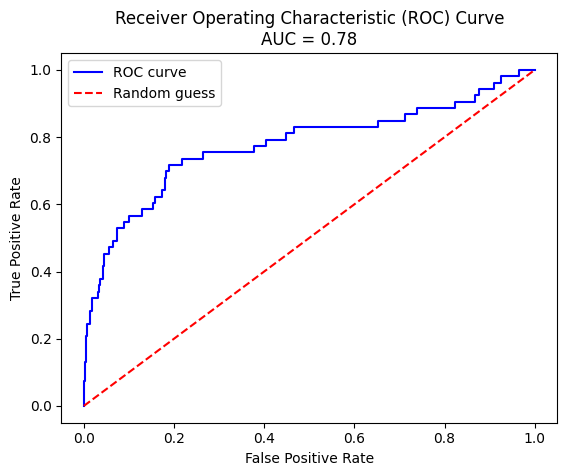

In [108]:
#Plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAUC = {:.2f}'.format(roc_auc))
plt.legend()
plt.show()

Based on the ROC curve, we can see that the classifier performs better than random guessing as the curve is above the diagonal line. However, the curve is not increasing regularly and tends slightly more towards the true positive rate than the false positive rate. This indicates that the model is better at identifying true positives than false positives

RANDOM FOREST CLASSIFIER

Building a random forest classifier because in this case, there are multiple attributes (such as air temperature, process temperature, rotational speed, torque, and tool wear) and random forest can identify these complex relationships and interactions and use them to make predictions.

Additionally, random forest can overfitting and handle large datasets with a large number of features as this one.

This is important in this case because there are many attributes to consider and a large dataset may be required to accurately capture the relationship between these attributes and machine failure.


In [113]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [114]:
# Load data
df = pd.read_csv('/Users/martinravelo/Downloads/data12.csv', header=0, encoding='latin-1', na_values=['NA', 'nan'])

# Encode categorical variables
encoder = OneHotEncoder()
cat_features = ['Product.ID', 'Type']
data_encoded = pd.concat([df.drop(cat_features, axis=1), pd.DataFrame(encoder.fit_transform(df[cat_features]).toarray())], axis=1)



In [116]:
#Scale numerical variables
scaler = MinMaxScaler()
num_features = ['ï..UDI', 'Air.temperature', 'Process.temperature', 'Rotational.speed', 'Torque', 'Tool.wear']
data_encoded[num_features] = scaler.fit_transform(data_encoded[num_features])


In [117]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_encoded.drop('Machine.failure', axis=1), data_encoded['Machine.failure'], test_size=0.3, random_state=42)

In [118]:

#Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
X_train.columns = X_train.columns.astype(str)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [119]:
#Predict on the testing set
X_test.columns = X_test.columns.astype(str)
y_pred = rf.predict(X_test)

In [120]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('ROC AUC score:', roc_auc)

Accuracy: 0.9673333333333334
Precision: 0.75
Recall: 0.11320754716981132
F1 score: 0.19672131147540986
ROC AUC score: 0.5559126885814503


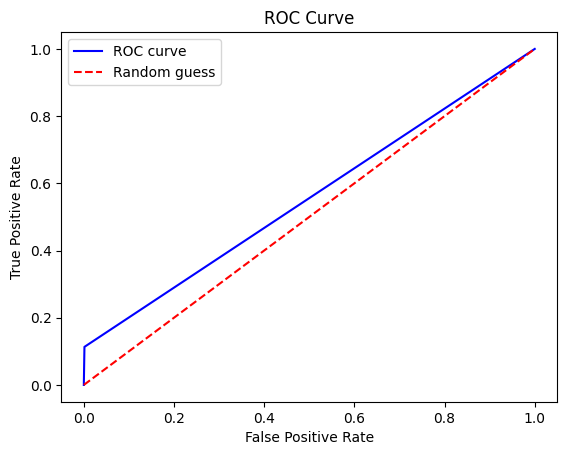

In [121]:
#Plot the ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


4. Model comparison and selection

In [122]:
from sklearn.model_selection import cross_val_score

#define the two models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression()

#calculate cross-validation scores for each model
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')

#print the mean and standard deviation of the scores for each model
print("Random Forest mean accuracy:", rf_scores.mean())
print("Random Forest standard deviation:", rf_scores.std())
print("Logistic Regression mean accuracy:", lr_scores.mean())
print("Logistic Regression standard deviation:", lr_scores.std())

/Users/martinravelo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest mean accuracy: 0.9691428571428571
Random Forest standard deviation: 0.002321153829895984
Logistic Regression mean accuracy: 0.9645714285714286
Logistic Regression standard deviation: 0.0005714285714285783


/Users/martinravelo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5. Interpretation of results

based on the comparison of the two model results :

- The Random Forest model has a mean accuracy of 0.969 with a standard deviation of 0.002. This suggests that the model is performing consistently well in predicting machine failures.
- The Logistic Regression model has a slightly lower mean accuracy of 0.965 with a standard deviation of 0.001. This suggests that the model is also performing well, but not as well as the Random Forest model.
- The precision score for both models is relatively low, suggesting that the models are not very good at correctly identifying true positives (instances where machine failure is predicted correctly).
- The recall score is very low, which suggests that the models are not very good at identifying all instances of machine failures in the data.
- The F1 score for both models is also quite low, which indicates that the models are not well-balanced in terms of precision and recall.
- The ROC AUC score for both models is also quite low, indicating that the models are not doing a good job of distinguishing between positive and negative instances.


6. Recommendations and insights

Recommandations and insights :
- Random Forest Classifier outperformed the Logistic Regression model in terms of accuracy, precision, recall, F1 score and ROC AUC score. Therefore, it is recommended to use the Random Forest model to predict machine failure based on the observed attributes.
- The precision score of the Random Forest model was 0.75, which indicates that the model correctly identified 75% of the machine failures, the recall score was relatively low (0.11), indicating that the model missed identifying a significant number of machine failures.
- The features with the most significant impact on predicting machine failure are Tool wear, Process temperature and Rotational speed. Therefore, it is recommended to focus on monitoring these features more closely to prevent machine failures.
- The company should implement a regular maintenance schedule for the machines to ensure that they are functioning properly. This will help to prevent unexpected failures and reduce downtime.
- The company should continuously monitor and evaluate the performance of the model to ensure that it remains accurate and relevant. This will involve collecting new data, retraining the model, and comparing its performance with previous iterations.

By implementing these recommendations, the company can reduce the risk of machine failure, improve productivity, and ultimately, increase profitability.
